## Flux distibution of residuals:

- Using `calfib`
- Removing continnum sources
- Removing bad fibers
- Removing bad pixels

In [2]:
import numpy as np
import json
import importlib

from het_cov import fibers
importlib.reload(fibers)


config_path = '/home/jovyan/work/hetdex/packs/hetdex_res/scripts/pca_calfib_norm.json'
with open(config_path, 'r') as f:
    config = json.load(f)

data_dir = '/home/jovyan/work/hetdex/data/'
fibs = fibers.Fibers(data_dir, 
                         config = config,
                         logging_level='INFO')

Fibers | 10/02/2025 09:30:38 PM | INFO  |  we have 6771 shotids in total
Fibers | 10/02/2025 09:30:38 PM | INFO  |  Masking options: {'bad_fibers': True, 'bad_pixels': True, 'strong_continuum': True, 'top_varying_pixels': False, 'top_percent': 5.0, 'top_fiber_frac': 0.3}
Fibers | 10/02/2025 09:30:38 PM | INFO  |  Covariance options: {'per': 'shot', 'method': 'pca', 'l': 100}
Fibers | 10/02/2025 09:30:38 PM | INFO  |  Flux, calfib_type: calfib


In [ ]:
fibs.get_flux_distribution()

Fibers | 10/02/2025 09:30:38 PM | INFO  |  6771 shotids remaining to compute flux distribution for.
Fibers | 10/02/2025 09:30:38 PM | INFO  |  working on shotid: 20240731009
Fibers | 10/02/2025 09:31:17 PM | INFO  |  Total fibers: 104160
Fibers | 10/02/2025 09:31:20 PM | INFO  |  Good fibers: 97197, Fraction of good pixels 0.9711028805368137
Fibers | 10/02/2025 09:31:27 PM | INFO  |   Remaining fraction after removing continuum sources 0.7058551189851539 
Fibers | 10/02/2025 09:31:33 PM | INFO  |  progress 0/6771
Fibers | 10/02/2025 09:31:33 PM | INFO  |  File /home/jovyan/work/hetdex/data/flux_dist.h5 already exists. Appending new data.
Fibers | 10/02/2025 09:31:33 PM | INFO  |  working on shotid: 20240731008
Fibers | 10/02/2025 09:32:12 PM | INFO  |  Total fibers: 104160
Fibers | 10/02/2025 09:32:14 PM | INFO  |  Good fibers: 94434, Fraction of good pixels 0.9709714218498131
Fibers | 10/02/2025 09:32:21 PM | INFO  |   Remaining fraction after removing continuum sources 0.819143528813

In [2]:
fdist, bins = fibs.get_flux_distribution_one_shot(fibs.shotids_list[-1000])

Fibers | 10/02/2025 06:29:30 PM | INFO  |  Total fibers: 60480
Fibers | 10/02/2025 06:29:31 PM | INFO  |  Good fibers: 58344, Fraction of good pixels 0.9687853879030349
Fibers | 10/02/2025 06:29:36 PM | INFO  |   Remaining fraction after removing continuum sources 0.7894385026737968 


In [3]:
fdist.shape

(1036, 999)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import matplotlib.cm as cm
import matplotlib.colors as mcolors

with h5py.File(f'{data_dir}/wave.h5', 'r') as f:
    wave = f['wave'][:]
# normalize wave values for colormap
norm = mcolors.Normalize(vmin=np.min(wave), vmax=np.max(wave))
cmap = cm.viridis

with h5py.File(f'/home/jovyan/work/hetdex/data/flux_dist.h5', 'r') as f:
    all_fdist = f['flux_dist'][:]
    bins = f['bins'][:]

all_fdist.shape

(12, 1036, 999)

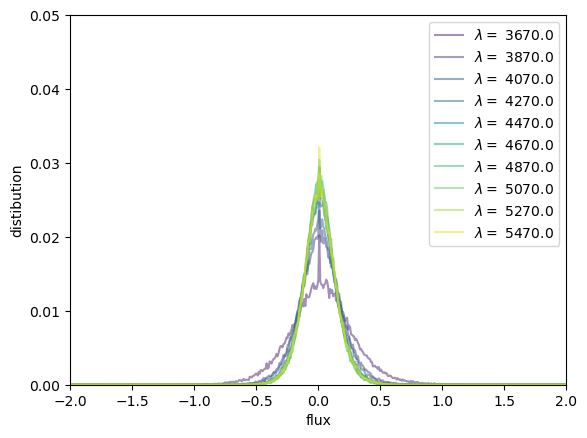

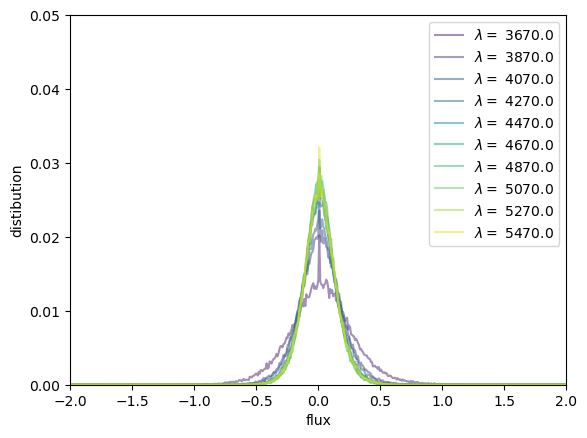

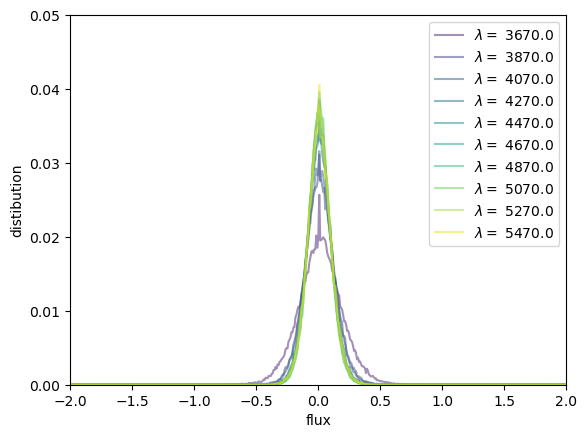

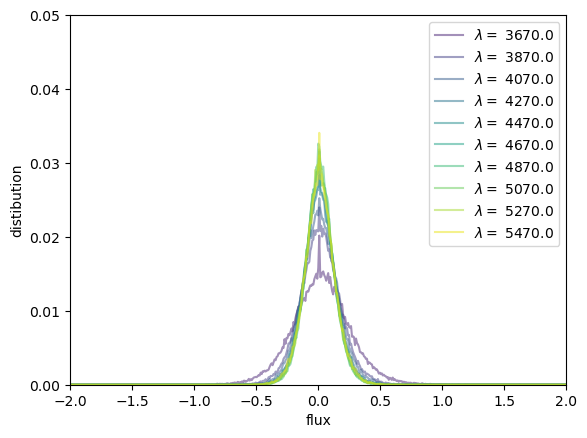

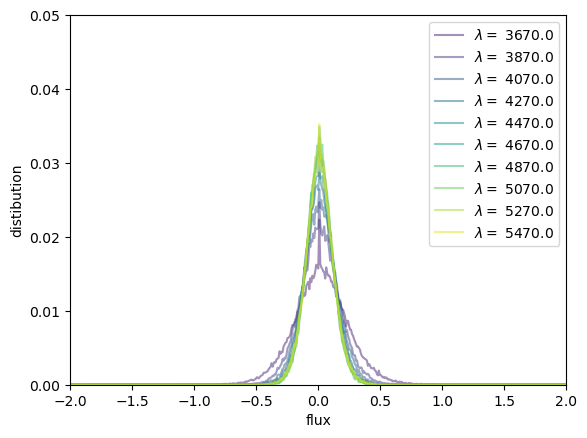

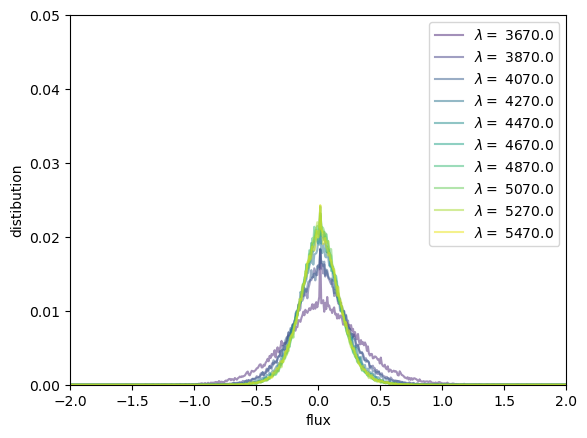

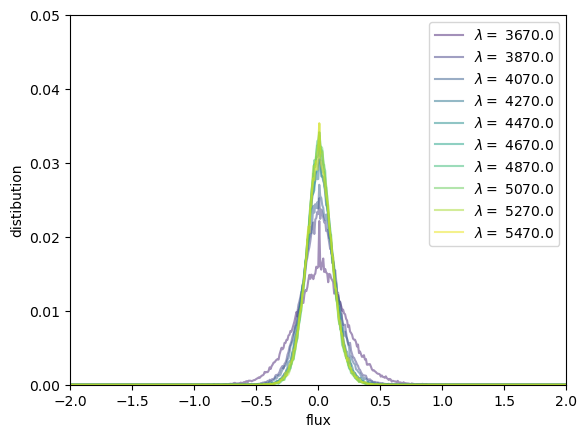

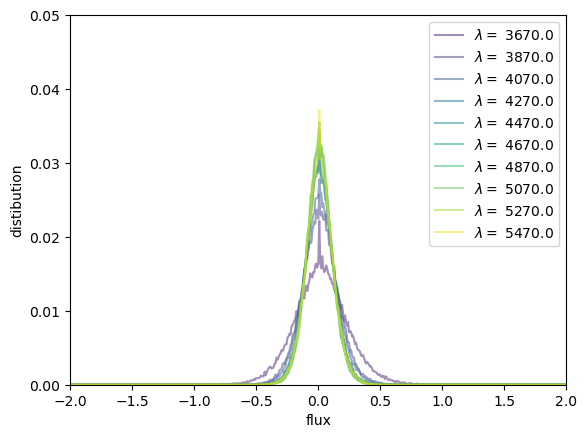

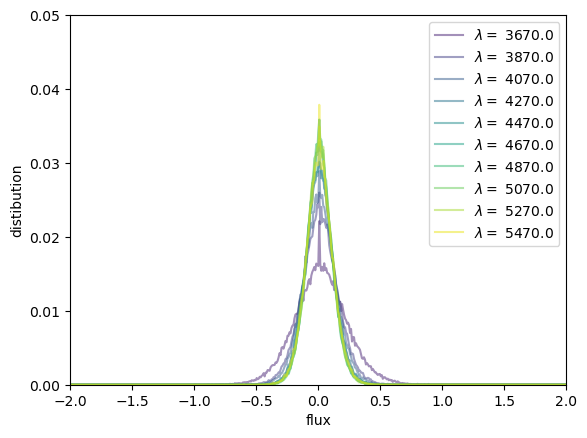

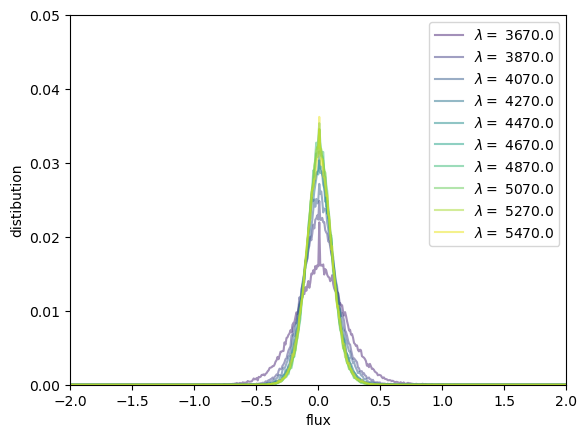

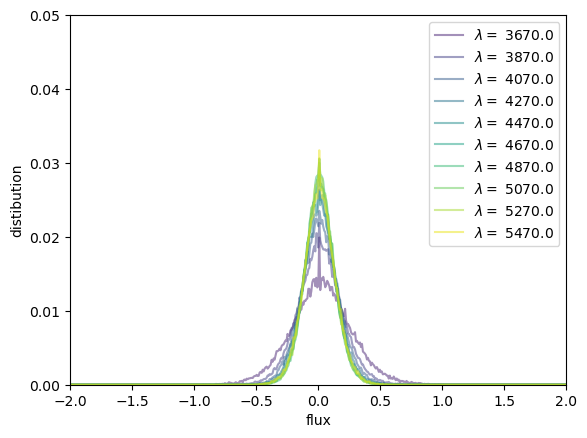

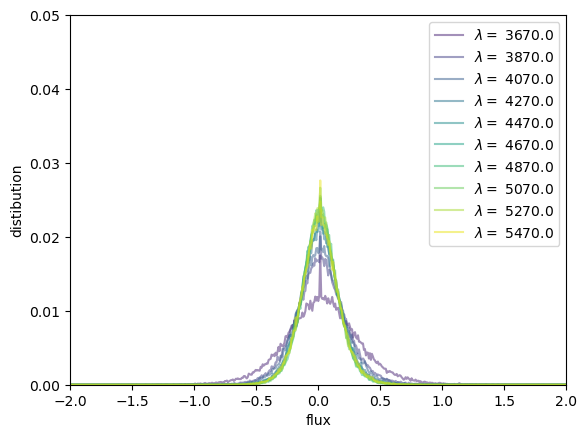

In [29]:




for fdist in all_fdist:

    fig, ax = plt.subplots(1,1)
    mbins = 0.5 * (bins[1:] + bins[:-1])
    for i in range(100, fdist.shape[0], 100):
        color = cmap(norm(wave[i]))
        ax.plot(mbins, fdist[i,:]/np.sum(fdist[i,:]), alpha=0.5, color=color, label=rf'$\lambda=$ {wave[i]}')
    
    ax.set_xlabel(f'flux')
    ax.set_ylabel('distibution')
    ax.set_xlim((-2,2))
    ax.set_ylim((0,0.05))
    ax.legend()

In [1]:
import importlib
from het_cov import plot
importlib.reload(plot)

data_dir = '/home/jovyan/work/hetdex/data/'

plot_fibs = plot.Fdist(data_dir=data_dir)

plot_fibs.fit_gaussian_to_flux_dist_one_shot(all_fdist[0])

AttributeError: 'Fdist' object has no attribute 'configure_logging'

In [37]:
all_fdist.shape

(12, 1036, 999)